In [1]:
import pandas as pd
df=pd.read_csv('Minimum Wage Data.csv',encoding='latin')
df.to_csv('MinimumWage.csv',encoding='utf-8')
df=pd.read_csv('MinimumWage.csv')
#df['Date']=pd.to_datetime(df['Year'])
df.dropna().head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2,2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)
5,5,1968,Colorado,1.00000,7.43,1.15,8.55,1.15,8.55,34.8,1.00 - 1.25(b),1.00000,7.43,1.25000,9.29,(b)
18,18,1968,Kentucky,0.65000,4.83,1.15,8.55,1.15,8.55,34.8,.65 - .75(b),0.65000,4.83,0.75000,5.57,(b)


In [8]:
gb=df.groupby("State")
gb.get_group('Arizona').set_index('Year')
act_min_wage=pd.DataFrame()
for name,group in gb:
    if act_min_wage.empty:
        act_min_wage=group.set_index('Year')[['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']].rename(columns={'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars':name})
    else:
        act_min_wage=act_min_wage.join(group.set_index('Year')[['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']].rename(columns={'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars':name}))

act_min_wage.dropna()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1979,0.0,12.11,0.00,8.19,10.33,6.77,10.37,7.13,8.76,0.00,...,0.0,4.99,10.33,7.84,10.33,8.37,8.19,7.84,9.98,5.70
1980,0.0,11.30,0.00,8.00,9.10,5.96,9.79,6.28,7.85,0.00,...,0.0,4.39,9.73,7.38,9.73,7.38,7.22,6.91,9.42,5.02
1981,0.0,10.96,0.00,7.68,9.53,5.41,9.59,5.69,7.11,0.00,...,0.0,3.98,9.53,7.11,9.53,7.54,6.54,7.83,9.25,4.55
1982,0.0,10.32,0.00,7.24,8.98,5.09,9.03,5.36,6.70,0.00,...,0.0,3.75,8.98,6.70,8.98,7.10,6.16,7.37,8.71,4.29
1983,0.0,10.00,0.00,7.01,8.70,4.93,8.75,5.19,6.49,0.00,...,0.0,3.64,8.70,6.49,8.70,6.88,5.97,7.14,8.44,4.16
1984,0.0,9.58,0.00,6.72,8.34,4.73,8.39,4.98,6.22,0.00,...,0.0,3.49,8.34,6.22,8.34,6.60,5.73,6.85,8.09,3.98
1985,0.0,9.26,0.00,6.49,8.05,4.57,8.10,4.81,6.01,0.00,...,0.0,3.37,8.05,6.01,8.05,6.37,5.53,6.61,7.81,3.85
1986,0.0,9.09,0.00,6.37,7.91,4.48,7.95,4.72,5.90,0.00,...,0.0,3.30,7.91,5.90,7.91,6.25,5.43,6.49,7.67,3.78
1987,0.0,8.77,0.00,6.15,7.63,4.33,7.67,4.55,5.69,0.00,...,0.0,3.19,7.63,5.69,7.63,6.03,5.24,6.26,7.40,3.64


<AxesSubplot:>

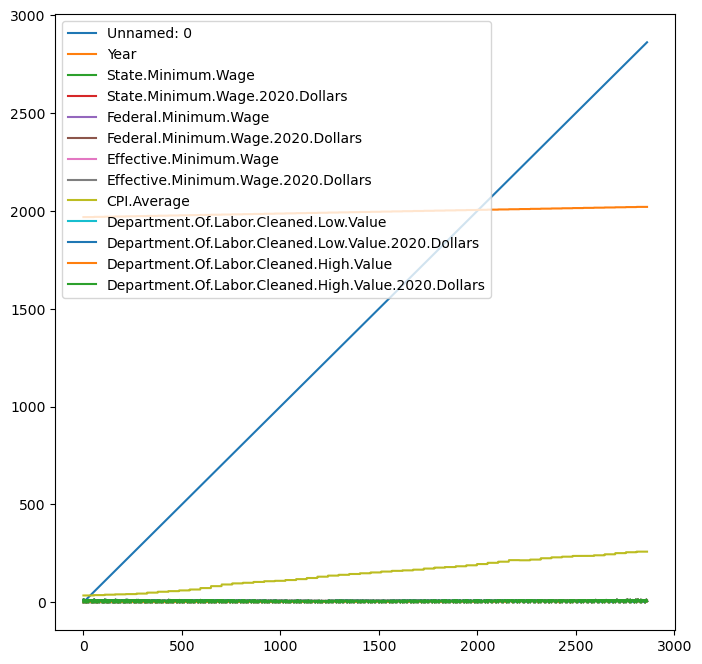

In [3]:
df.plot(figsize=(8,8))

In [10]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,42.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,6.980238,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,1.815899,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,4.430000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,5.225000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000
50%,0.0,9.260000,0.000000,7.210000,9.010000,6.670000,9.430000,8.170000,8.840000,0.000000,...,0.0,6.360000,7.105000,7.220000,9.240000,7.210000,9.700000,7.370000,7.810000,5.550000
75%,0.0,10.510000,8.290000,7.740000,9.710000,8.430000,9.870000,8.620000,9.600000,8.210000,...,0.0,7.350000,8.270000,7.660000,9.820000,7.810000,10.180000,7.930000,8.340000,6.820000
max,0.0,15.610000,12.140000,10.000000,13.000000,12.140000,11.450000,9.900000,14.160000,8.790000,...,0.0,8.660000,10.620000,8.600000,11.090000,9.090000,13.660000,9.430000,9.980000,9.280000


In [16]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.037101,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,-0.193062,...,NaN,-0.507366,0.305388,-0.017546,0.615675,-0.593675,0.378141,0.056924,0.683108,0.726771
Arizona,NaN,0.037101,1.000000,0.271834,0.639006,0.820730,0.555455,0.477781,0.723523,0.907295,...,NaN,0.398732,-0.421255,0.413915,0.624314,0.096048,0.691863,0.663311,0.014723,0.288171
Arkansas,NaN,-0.332127,0.271834,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.340509,...,NaN,0.520381,0.080528,0.208586,0.236875,0.572595,0.130825,0.504703,-0.069024,-0.235369
California,NaN,0.622245,0.639006,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.443946,...,NaN,-0.109316,-0.061610,0.367924,0.894617,-0.216247,0.816087,0.492809,0.382444,0.598739


In [20]:
issue_happen=df[df['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']==0]


array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [25]:
import numpy as np
min_wage_corr=act_min_wage.replace(0,np.NAN).dropna(axis=1).corr().head()
for problem in issue_happen['State'].unique():
    if problem in min_wage_corr.columns:
        print('Something is missed here')

In [33]:
goup_issues=issue_happen.groupby('State')
goup_issues.get_group('Alabama').head()

,Unnamed: 0,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
54,54,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
108,108,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
162,162,1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
216,216,1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [34]:
for state,data in goup_issues:
    if data['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars'].sum()==0:
        print('Something is Wrong here....')
        

Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
Something is Wrong here....
